# Projeto - Algoritmos de Inteligência Artificial para classificação

Docente: Ícaro Augusto Maccari Zelioli 

Author: Alexandre José Messias de Lara

## 1. Comprovante de finalização do módulo [Kaggle Intro to Machine Learning](https://www.kaggle.com/learn/intro-to-machine-learning)

Descrição: Comprove a finalização do módulo com um print que contenha data e identificação do aluno. 

Trabalho com base:

Iremos usar a base de dados de vinhos verdes portugueses (nas variantes branco e tinto) que encontra-se disponível no Kaggle:

Para as questões 2-5 usaremos apenas os vinhos do tipo "branco".

![Certificado de conclusão Kaggle Intro To Machine Learning - Alexandre Lara](assets/2025-02-18%20certificate%20kaggle%20intro%20to%20machine%20learning.png)

# 2. Carregamento da base

Faça o download da base - esta é uma base real, apresentada no artigo:
P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

Ela possui uma variável denominada "quality", uma nota de 0 a 10 que denota a qualidade do vinho. Crie uma nova variável, chamada "opinion" que será uma variável categórica igual à 0, quando quality for menor e igual à 5. O valor será 1, caso contrário. Desconsidere a variável quality para o restante da análise.

----------------

### Instalação das dependências

As dependências necessárias são instaladas abaixo:

In [1]:
!uv add pandas
!uv add numpy
!uv add seaborn
!uv add matplotlib
!uv add scikit-learn

Resolved 50 packages in 0.39ms
Audited 19 packages in 0.05ms
Resolved 50 packages in 0.38ms
Audited 19 packages in 0.04ms
Resolved 50 packages in 0.44ms
Audited 19 packages in 0.04ms
Resolved 50 packages in 0.37ms
Audited 19 packages in 0.04ms
Resolved 50 packages in 0.38ms
Audited 19 packages in 0.04ms


### Importação das dependências

Para dar início no processo de criação do modelo, todas as dependências do projeto são importadas.

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report, precision_recall_curve, roc_curve, roc_auc_score, make_scorer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
import warnings

In [3]:
warnings.filterwarnings('ignore')

Os dados se encontram na pasta `data`. A biblioteca `pandas` é utilizada para poder fazer a leitura do arquivo `csv` e a criação do dataframe.

In [4]:
wine_data_csv_file_path = os.path.join('data', 'winequalityN.csv')
wine_data = pd.read_csv(wine_data_csv_file_path)

wine_data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


### Modificação dos nomes das colunas

Para facilitar a manipulação futura dos dados é efetuada uma modificação no nome das colunas que compõem o dataframe com a finalidade de substituir espaços por 'underscores' e deixar tudo em caracteres minúsculos.

In [5]:
wine_data.columns = wine_data.columns.str.replace(' ', '_').str.lower()
wine_data.columns

Index(['type', 'fixed_acidity', 'volatile_acidity', 'citric_acid',
       'residual_sugar', 'chlorides', 'free_sulfur_dioxide',
       'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol',
       'quality'],
      dtype='object')

### Criação da variável 'opinion'

O exercício solicita que uma variável categórica "opinion" seja criada com base na variável "quality".

- O valor de opinion é 0, quando quality for menor ou igual a 5.
- O valor de opinion é 1, quando quality for maior que 5.

In [6]:
wine_data["opinion"] = np.where(wine_data["quality"] <= 5, 0, 1)

# 3. Definição das variáveis, médias e desvios padrões

Descrição da questão: Descreva as variáveis presentes na base. Quais são as variáveis? Quais são os tipos de variáveis (discreta, categórica, contínua)? Quais são as médias e desvios padrões?

Visualização das variáveis:

In [7]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed_acidity         6487 non-null   float64
 2   volatile_acidity      6489 non-null   float64
 3   citric_acid           6494 non-null   float64
 4   residual_sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   ph                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
 13  opinion               6497 non-null   int64  
dtypes: float64(11), int64(2), object(1)
memory usage: 710.7+ KB


Com base na análise realizada no dataset, as variáveis se dividem em:
- Categóricas: type, opinion
- Contínua: fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlorides, free_sulfur_dioxide, total_sulfur_dioxide, density, ph, sulphates, alcohol
- Discreta: quality

### Obtenção das médias e desvios padrões de cada variável.

- mean: corresponde as médias
- std: corresponde aos desvios padrões

In [8]:
wine_data.drop(columns=["opinion"]).describe().loc[["mean", "std"]]

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255


# 4. Criação de modelo de classificação

Com a base escolhida:

a) Descreva as etapas necessárias para criar um modelo de classificação eficiente.

1. Obtenção, carregamento e compreensão dos dados.

    Uma vez que a base foi baixada, é necessário carregá-la de forma que nos permita manipulá-la. Neste projeto, estaremos utilizando a biblioteca `pandas`, que será responsável por ler a base que contém variantes de vinhos brancos e tintos do "Vinho Verde" português.

    Podemos utilizar comandos como `data.head()`, `data.info()` e `data.describe()` para entender mais sobre os dados, sua quantidade, médias, desvios padrões, variáveis, tipos de variáveis, etc.

    Devemos levar em consideração um levantamento de requisitos para a solução que estamos trabalhando, identificando o problema, os dados disponíveis e os objetivos que queremos alcançar.

2. Tratamento de dados

    Uma vez que temos uma compreensão dos dados, podemos avaliar se existem dados faltantes e tratá-los corretamente, seja com o preenchimento ou a remoção das linhas com dados faltantes. Podemos identificar outliers e decidir o que faremos com eles, por exemplo, removendo-os da base e sempre lembrando de documentar isso no projeto. Podemos também realizar o tratamento do nome de colunas para facilitar a manipulação.

3. Exploração e análise de dados

    Nesta etapa, podemos realizar uma análise do balanceamento de classes, para podermos determinar se estaremos trabalhando com uma base balanceada ou não. Entender isso é importante até para a escolha da métrica de avaliação, por exemplo: a acurácia não funciona bem para bases desbalanceadas.

    Podemos também efetuar a análise de separabilidade linear, buscando identificar se existem variáveis que nos possível separar o dataset linearmente. É importante destacar que a regressão linear é semelhante à separabilidade linear, porém na regresão a gente está buscando prever um valor contínuo que melhor separa um grupo de dados, enquanto que na separabilidade linear a ideia é tentar classificar os dados em categorias discretas, por exemplo, no problema deste projeto seria em "1" (para um vinho de boa qualidade) e "0" para um vinho que não é de boa qualidade.

    Devemos também selecionar as variáveis numéricas e analisar a necessidade de tratar variáveis categóricas.

4. Divisão dos dados

    Existe uma necessidade de separar os dados em conjuntos de treino e de teste para evitar overfitting e avaliar erros de generalização. Nesta etapa, é comum fazermos a amostragem estratificada para que as proporções sejam mantidas entre as diferentes classes, isso evita que uma classe que contenha poucos dados fique sub-representada quando faz a separação dos conjuntos de treino e teste.

5. Pré-processamento e Treinamento

    Podemos fazer o pré-processamento dos dados, por exemplo aplicando métodos para escalonamento dos dados (tais como: normalização, padronização e padronização robusta).
    
    Uma vez que escolhemos o modelo de classificação que desejamos utilizar (Regressão Logística, Árvore de Decisão, SVM, etc) devemos realizar o treinamento do modelo. Iniciamos criando um modelo base para fins de comparação de desempenho, é comum chamarmos esse modelo de "baseline". 

    Usando técnicas como Grid Search e Random Search podemos fazer o ajuste dos hiperparâmetros. Fazemos uso de validação cruzada a fim de evitar overfitting.

6. Avaliação do modelo

    Uma vez que o modelo foi treinado no conjunto de treino, devemos fazer a previsão no conjunto de teste e fazermos a avaliação do modelo por meio de métricas. Para isso, podemos avaliar as métricas estatísticas: acurácia, precisão, recall, f1-score e plotar a matriz de confusão. Outra opção é avaliar as métricas de negócio, que leva em conta parâmetros do negócio para avaliar o desempenho do modelo. Também podemos utilizar métricas complementares como curva precision x recall, curva ROC e AUC-ROC.

7. Implementação, monitoramento e otimização

    Uma vez validado o modelo, pode-se fazer a integração com um sistema real, devemos sempre estar monitorando o desempenho e realizando o re-treinamento quando necessário, além de avaliar se serão necessários continuar fazendo ajustes.



### Preparando os dados

Análise dos valores nulos

In [9]:
wine_data.isna().sum()

type                     0
fixed_acidity           10
volatile_acidity         8
citric_acid              3
residual_sugar           2
chlorides                2
free_sulfur_dioxide      0
total_sulfur_dioxide     0
density                  0
ph                       9
sulphates                4
alcohol                  0
quality                  0
opinion                  0
dtype: int64

#### Realizando a limpeza dos valores nulos

A quantidade de linhas com dados faltantes é bem pequena em relação à amostragem total da base de dados, em razão disto, as linhas com valores nulos serão removidas.

In [10]:
wine_data.dropna(inplace=True)

wine_data.isna().sum()

type                    0
fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
opinion                 0
dtype: int64

#### Separação da base de vinhos brancos e tintos

In [11]:
# Contagem do total de vinhos de cada tipo
print("\n📊 Contagem total de vinhos:")
print(wine_data["type"].value_counts())
print("-"*50)

# Separação dos vinhos brancos e tintos
white_wine_data = wine_data[wine_data["type"] == "white"]
red_wine_data = wine_data[wine_data["type"] == "red"]

# Certificando que a quantidade de vinhos brancos é a mesma
print("🍾 Vinhos Brancos:")
print(white_wine_data["type"].value_counts())
print("-"*50)

# Certificando que a quantidade de vinhos tintos é a mesma
print("🍷 Vinhos Tintos:")
print(red_wine_data["type"].value_counts())
print("-"*50)


📊 Contagem total de vinhos:
type
white    4870
red      1593
Name: count, dtype: int64
--------------------------------------------------
🍾 Vinhos Brancos:
type
white    4870
Name: count, dtype: int64
--------------------------------------------------
🍷 Vinhos Tintos:
type
red    1593
Name: count, dtype: int64
--------------------------------------------------


- Removendo a variável "quality" que deve ser desconsiderada para a criação do modelo.
- Removendo a variável "type" considerando que já houve a separação com base no tipo de vinho (branco ou tinto)

In [12]:
white_wine_data.drop(columns=["quality", "type"], inplace=True)

In [13]:
white_wine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,opinion
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


#### Análise de separabilidade linear

Devemos verificar se existem variáveis que permitem separar linearmente o dataset. Se houvesse a viabilidade de realizar uma separação linear, pode ser que somente a existência de uma condicional fosse suficiente, sem a necessidade de criação de um modelo mais complexo.

Avaliação da distribuição de classes

In [14]:
white_wine_data['opinion'].value_counts()

opinion
1    3240
0    1630
Name: count, dtype: int64

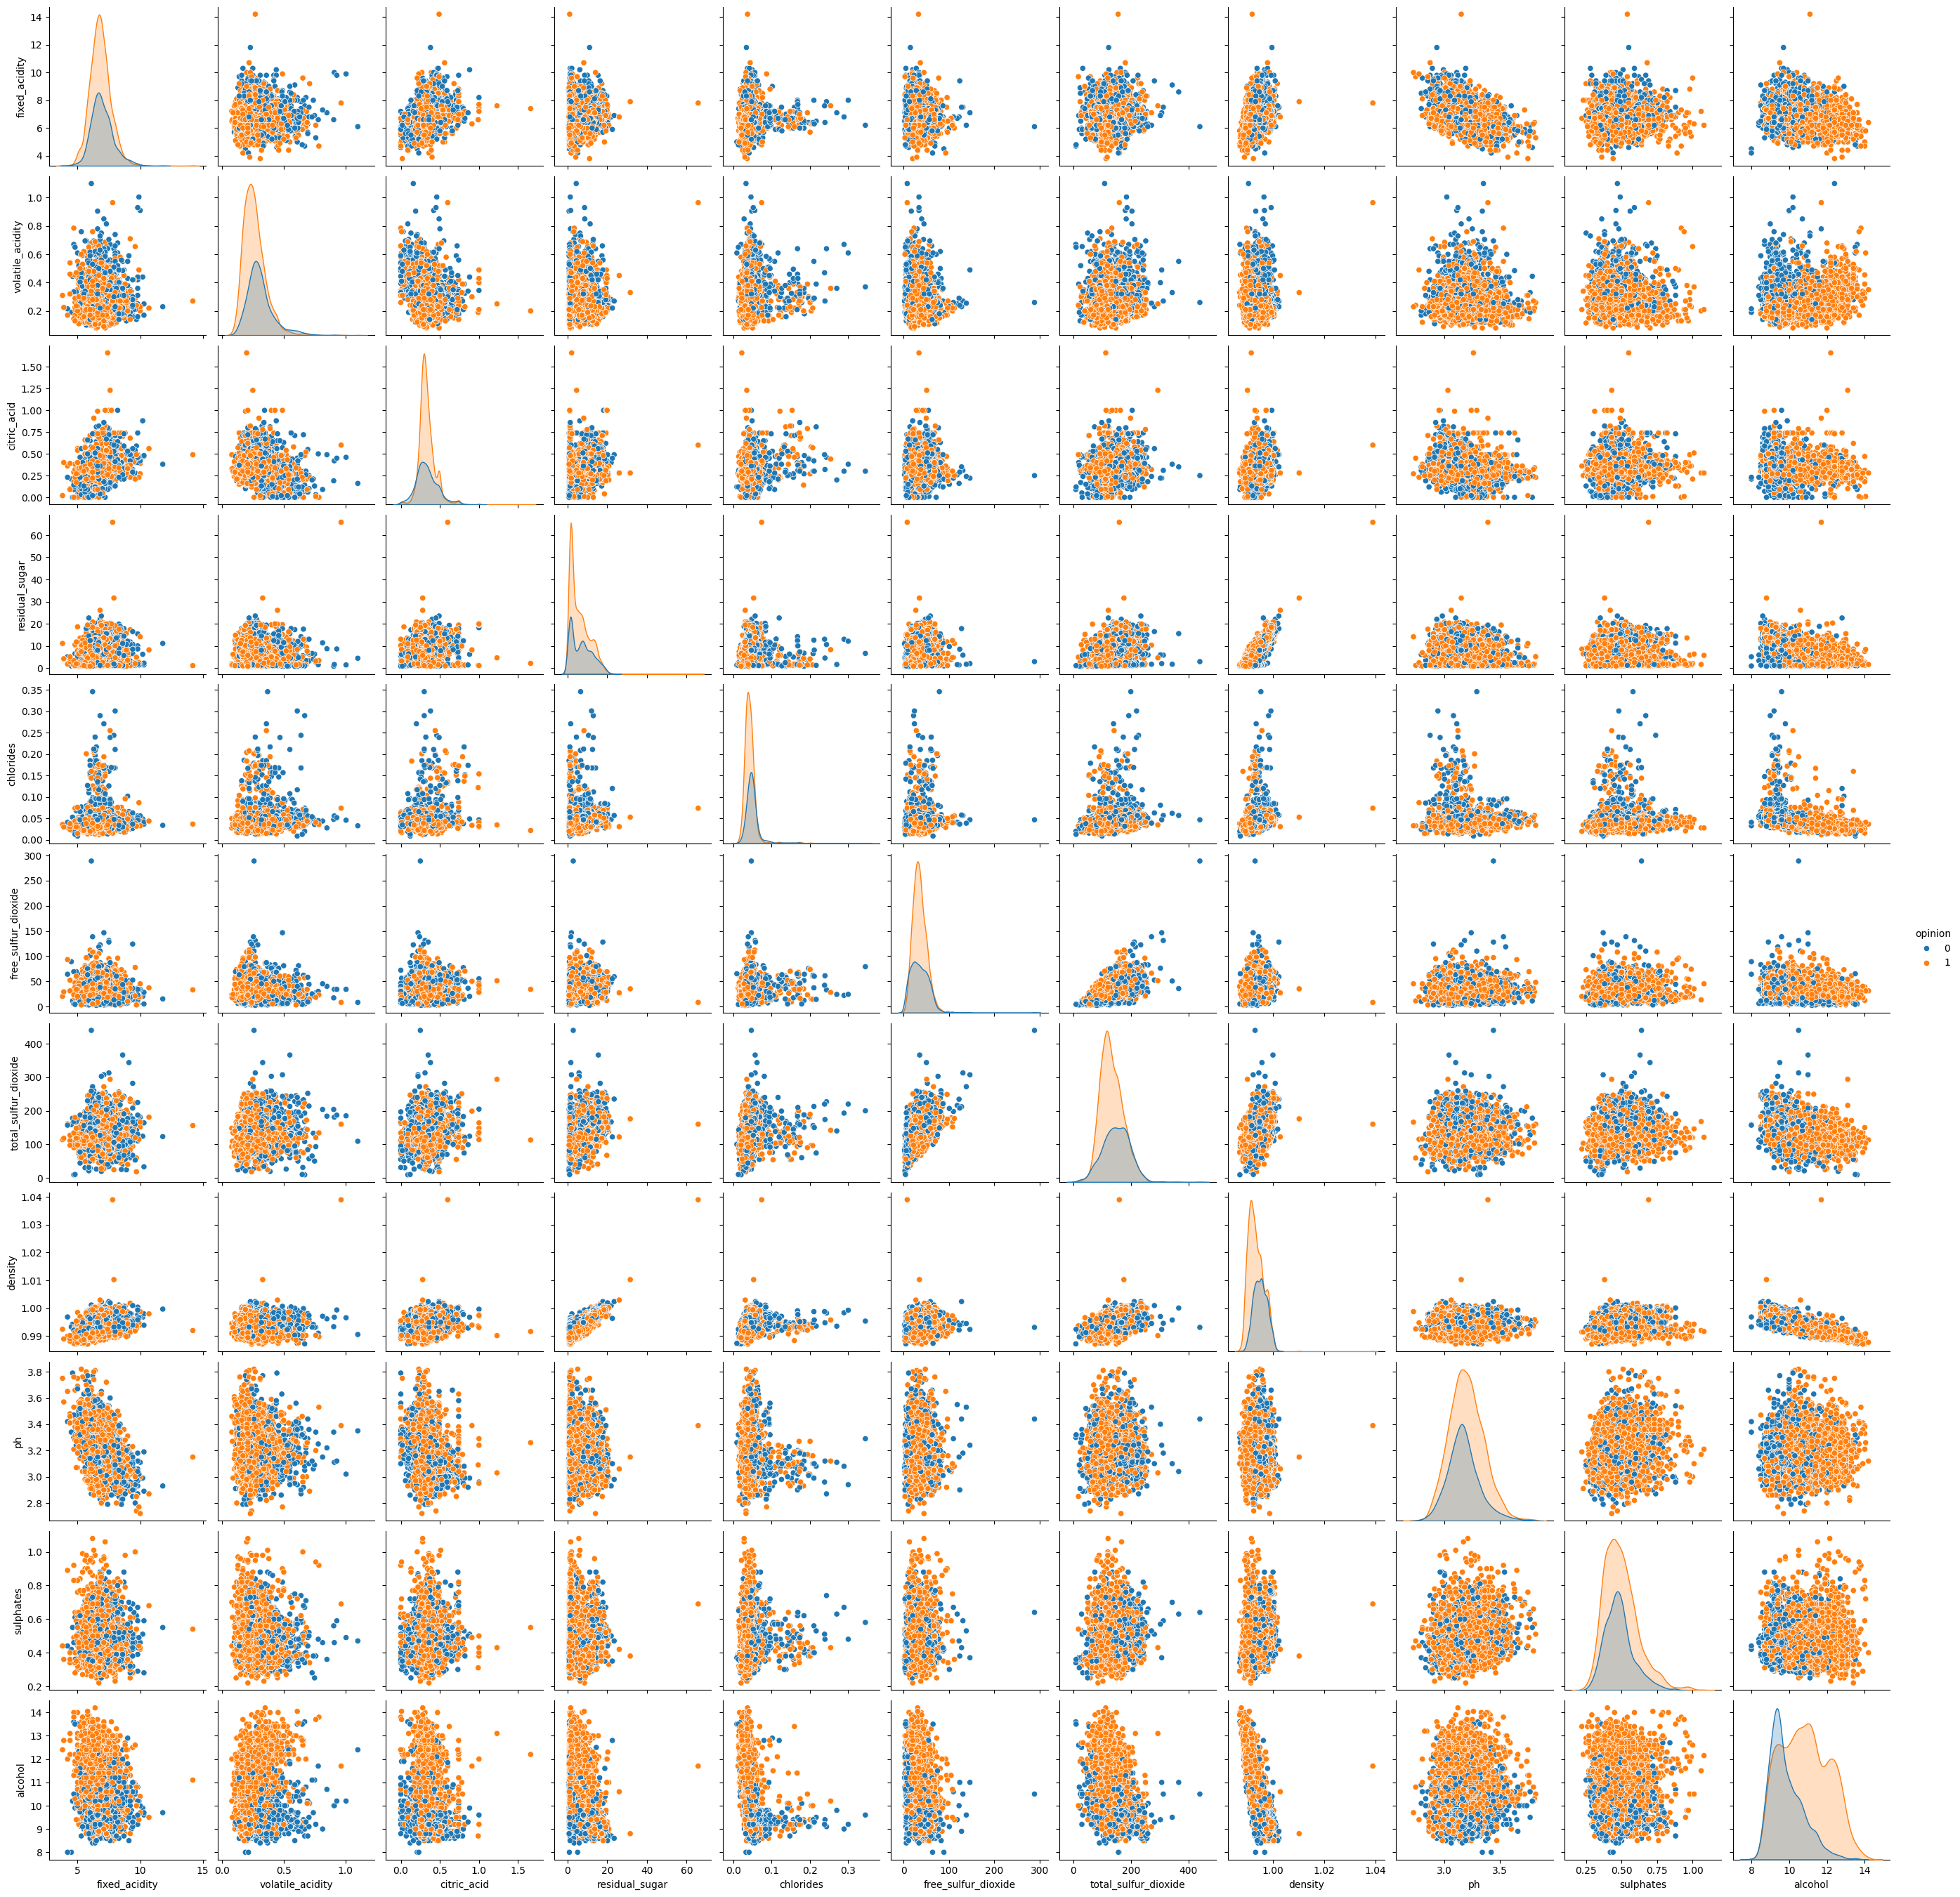

In [15]:
sns.pairplot(data=white_wine_data, hue='opinion')

Com base na observação visual dos pares de variáveis plotados acima, não é possível definir que o dataset pode ser separado linearmente considerando os diferentes pares de variáveis.

#### Separação treino e teste

Os dados são separados entre treino e teste. Os dados de teste corresponderão a 30% do total de dados. A divisão estratificada é realizada para garantir que cada classe da variável alvo esteja na mesma proporção nos conjuntos de teste e de treino, ainda mais considerando que a nossa base de dados é desbalanceada (contendo mais amostras de classe 1 do que 0).

In [16]:
target = 'opinion'
X = white_wine_data.drop(columns=[target])
y = white_wine_data[[target]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Realizando a análise de proporções

Dados totais:


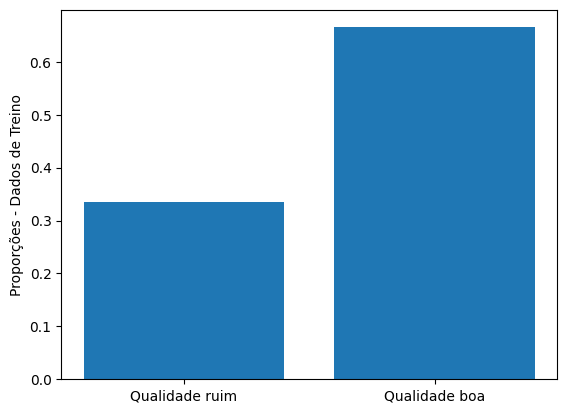

Dados de treino:


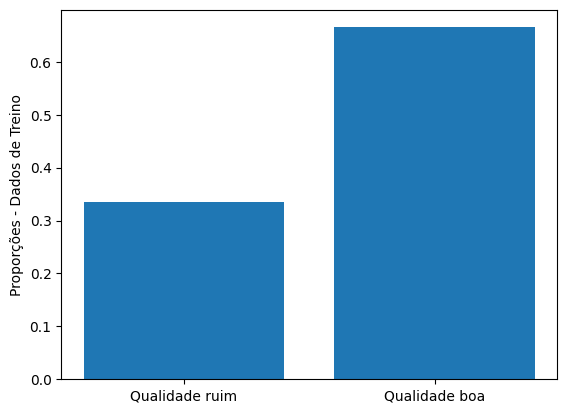

Dados de teste:


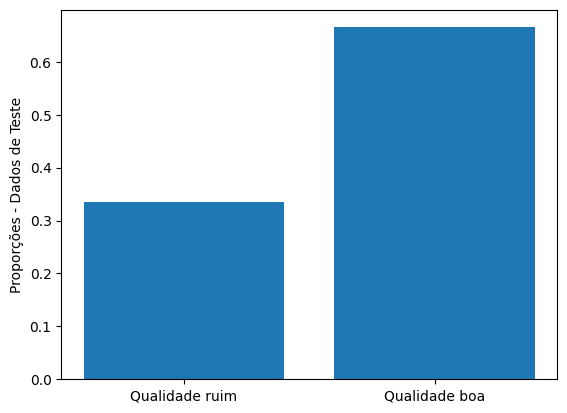

In [17]:
# análise de proporções
props = pd.DataFrame(y.value_counts(normalize=True).values, columns=['original'])
props['train'] = y_train.value_counts(normalize=True).values
props['test'] = y_test.value_counts(normalize=True).values
props

print("Dados totais:")

props = y_train[target].value_counts(normalize=True)

plt.bar(x=props.index, height=props.values)
plt.xticks(ticks=[0, 1], labels=['Qualidade ruim', 'Qualidade boa'])
plt.ylabel('Proporções - Dados de Treino')
plt.show()

print("Dados de treino:")

props = y_train[target].value_counts(normalize=True)

plt.bar(x=props.index, height=props.values)
plt.xticks(ticks=[0, 1], labels=['Qualidade ruim', 'Qualidade boa'])
plt.ylabel('Proporções - Dados de Treino')
plt.show()

print("Dados de teste:")

props = y_test[target].value_counts(normalize=True)

plt.bar(x=props.index, height=props.values)
plt.xticks(ticks=[0, 1], labels=['Qualidade ruim', 'Qualidade boa'])
plt.ylabel('Proporções - Dados de Teste')
plt.show()

#### Criação do modelo baseline

O modelo baseline tem como hipótese de que todos os vinhos são de qualidade e portanto pertencem à classe 1.

In [18]:
y_base = np.repeat(1, repeats=len(y_test))

# Obtendo as métricas do modelo baseline
print(classification_report(y_test, y_base))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       489
           1       0.67      1.00      0.80       972

    accuracy                           0.67      1461
   macro avg       0.33      0.50      0.40      1461
weighted avg       0.44      0.67      0.53      1461



Realizando a avaliação de grandezas

- Esta é uma etapa interessante para entender de que existem dados com grandezas diferentes no dataset, o que será importante para o processo de escalonamento de dados.

In [19]:
X_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol
136,8.2,0.23,0.40,1.20,0.027,36.0,121.0,0.9920,3.12,0.38,10.7
1519,8.3,0.20,0.49,1.70,0.040,34.0,169.0,0.9938,3.05,0.37,10.1
1642,7.3,0.19,0.49,15.55,0.058,50.0,134.0,0.9998,3.42,0.36,9.1
1369,7.4,0.64,0.47,14.15,0.168,42.0,185.0,0.9984,2.90,0.49,9.3
193,6.6,0.15,0.34,5.10,0.055,34.0,125.0,0.9942,3.36,0.42,9.6


Criando pipeline de processamento

In [20]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3409 entries, 136 to 4143
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         3409 non-null   float64
 1   volatile_acidity      3409 non-null   float64
 2   citric_acid           3409 non-null   float64
 3   residual_sugar        3409 non-null   float64
 4   chlorides             3409 non-null   float64
 5   free_sulfur_dioxide   3409 non-null   float64
 6   total_sulfur_dioxide  3409 non-null   float64
 7   density               3409 non-null   float64
 8   ph                    3409 non-null   float64
 9   sulphates             3409 non-null   float64
 10  alcohol               3409 non-null   float64
dtypes: float64(11)
memory usage: 319.6 KB


Definindo as colunas numéricas
- No caso do dataset de vinhos, todas as variáveis são numéricas. 

In [21]:
# Obtendo as colunas numéricas
numeric_features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol']

pre_processor = ColumnTransformer(
    [
        ('numeric', RobustScaler(), numeric_features)
    ]
)

Configurando o gerador de amostragem estratificada

In [22]:
splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

Definindo múltiplas métricas para poder avaliar cada modelo posteriormente

In [39]:
scoring_metrics = {
    "accuracy": make_scorer(accuracy_score),
    "precision": make_scorer(precision_score, average="weighted"),
    "recall": make_scorer(recall_score, average="weighted"),
    "f1": make_scorer(f1_score, average="weighted"),
}

b) Treine um modelo de regressão logística usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:

i. a média e desvio da acurácia dos modelos obtidos;

ii. a média e desvio da precisão dos modelos obtidos;

iii. a média e desvio da recall dos modelos obtidos;

iv. a média e desvio do f1-score dos modelos obtidos.

Criando a pipeline da regressão logística com modelo de validação cruzada estratificada com k-folds (k=10)

In [23]:
logistic_regression_pipeline = Pipeline([
    ('transformer', pre_processor),
    ('selector', SelectKBest(f_classif)),
    ('model', LogisticRegression(solver='saga'))
])

Configurando o espaço de busca a regressão logística

In [24]:
param_grid_logistic_regression = {
    'model__penalty': ['l1', 'l2', 'elasticnet', None],
    'model__C': [0.001, 0.01, 0.1, 1, 10],
    'model__l1_ratio': [0.25, 0.5, 0.75],
    'model__class_weight': ['balanced', None],
    'selector__k': range(1, 11)
}

Configura busca aleatória para a regressão logística

In [44]:
random_search_logistic_regression = RandomizedSearchCV(
    estimator=logistic_regression_pipeline,
    param_distributions=param_grid_logistic_regression,
    n_iter=50,
    scoring=scoring_metrics,
    cv=splitter,
    refit="f1",
    error_score=0,
    random_state=42
)

Realizando a busca dos melhores parâmetros para a Regressão Logística

In [45]:
random_search_logistic_regression.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   error_score=0,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               RobustScaler(),
                                                                               ['fixed_acidity',
                                                                                'volatile_acidity',
                                                                                'citric_acid',
                                                                                'residual_sugar',
                                                                                'chlorides',
                                                                                'free_sulfur_dioxide',
                                                                                'total_sulfur_dioxide',
                                                                                'density',
                                                                                'ph',
                                                                                'sulphates',
                                                                                'alcoh...
                                        'selector__k': range(1, 11)},
                   random_state=42, refit='f1',
                   scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                            'f1': make_scorer(f1_score, response_method='predict', average=weighted),
                            'precision': make_scorer(precision_score, response_method='predict', average=weighted),
                            'recall': make_scorer(recall_score, response_method='predict', average=weighted)})

Calculando as métricas para o modelo de Regressão Logística

In [49]:
yhat_logistic_regression = random_search_logistic_regression.best_estimator_.predict(X_test)

# Extraindo os resultados da validação cruzada
cv_results_logistic_regression = random_search_logistic_regression.cv_results_

# Calculando média e desvio padrão para cada métrica
metrics = ["accuracy", "precision", "recall", "f1"]

for metric in metrics:
    mean_score = np.mean(cv_results_logistic_regression[f"mean_test_{metric}"])
    std_score = np.std(cv_results_logistic_regression[f"mean_test_{metric}"])
    print(f"{metric.capitalize()} - Média: {mean_score:.4f}, Desvio Padrão: {std_score:.4f}")


Accuracy - Média: 0.6915, Desvio Padrão: 0.0749
Precision - Média: 0.6720, Desvio Padrão: 0.1508
Recall - Média: 0.6915, Desvio Padrão: 0.0749
F1 - Média: 0.6669, Desvio Padrão: 0.1209



c) Treine um modelo de árvores de decisão usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:

i. a média e desvio da acurácia dos modelos obtidos;

ii. a média e desvio da precisão dos modelos obtidos;

iii. a média e desvio da recall dos modelos obtidos;

iv. a média e desvio do f1-score dos modelos obtidos.

Criando a pipeline da Árvore de Decisão com modelo de validação cruzada estratificada com k-folds (k=10)

In [27]:
decision_tree_pipeline = Pipeline([
    ('transformer', pre_processor),
    ('selector', SelectKBest(f_classif)),
    ('model', DecisionTreeClassifier(random_state=42))
])

Configurando o espaço de busca a Árvore de Decisão

In [28]:
param_grid_decision_tree = {
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': range(2, 11),
    'model__class_weight': ['balanced', None],
    'selector__k': range(1, 11)
}

Configura busca aleatória para a Árvore de Decisão

In [50]:
random_search_decision_tree = RandomizedSearchCV(
    estimator=decision_tree_pipeline,
    param_distributions=param_grid_decision_tree,
    n_iter=50,
    scoring=scoring_metrics,
    cv=splitter,
    refit='f1',
    error_score=0,
    random_state=42
)

Realizando a busca dos melhores parâmetros para a Árvore de Decisão

In [51]:
random_search_decision_tree.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   error_score=0,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               RobustScaler(),
                                                                               ['fixed_acidity',
                                                                                'volatile_acidity',
                                                                                'citric_acid',
                                                                                'residual_sugar',
                                                                                'chlorides',
                                                                                'free_sulfur_dioxide',
                                                                                'total_sulfur_dioxide',
                                                                                'density',
                                                                                'ph',
                                                                                'sulphates',
                                                                                'alcoh...
                                        'selector__k': range(1, 11)},
                   random_state=42, refit='f1',
                   scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                            'f1': make_scorer(f1_score, response_method='predict', average=weighted),
                            'precision': make_scorer(precision_score, response_method='predict', average=weighted),
                            'recall': make_scorer(recall_score, response_method='predict', average=weighted)})

Calculando as métricas para a Árvore de decisão

In [52]:
yhat_decision_tree = random_search_decision_tree.best_estimator_.predict(X_test)

# Extraindo os resultados da validação cruzada
cv_results_decision_tree = random_search_decision_tree.cv_results_

# Calculando média e desvio padrão para cada métrica
metrics = ["accuracy", "precision", "recall", "f1"]

for metric in metrics:
    mean_score = np.mean(cv_results_decision_tree[f"mean_test_{metric}"])
    std_score = np.std(cv_results_decision_tree[f"mean_test_{metric}"])
    print(f"{metric.capitalize()} - Média: {mean_score:.4f}, Desvio Padrão: {std_score:.4f}")


Accuracy - Média: 0.7269, Desvio Padrão: 0.0290
Precision - Média: 0.7411, Desvio Padrão: 0.0209
Recall - Média: 0.7269, Desvio Padrão: 0.0290
F1 - Média: 0.7280, Desvio Padrão: 0.0282


d) Treine um modelo de SVM usando um modelo de validação cruzada estratificada com k-folds (k=10) para realizar a classificação. Calcule para a base de teste:

i. a média e desvio da acurácia dos modelos obtidos;

ii. a média e desvio da precisão dos modelos obtidos;

iii. a média e desvio da recall dos modelos obtidos;

iv. a média e desvio do f1-score dos modelos obtidos.

Criando a pipeline da SVM com modelo de validação cruzada estratificada com k-folds (k=10)

In [31]:
svc_pipeline = Pipeline([
    ('transformer', pre_processor),
    ('selector', SelectKBest(f_classif)),
    ('model', SVC(random_state=42))
])

Configurando o espaço de busca da SVM

In [32]:
param_grid_svc = {
    'selector__k': range(1, 11)
}

Configura busca aleatória para a Árvore de Decisão

In [54]:
random_search_svc = RandomizedSearchCV(
    estimator=svc_pipeline,
    param_distributions=param_grid_svc,
    n_iter=50,
    scoring=scoring_metrics,
    cv=splitter,
    refit='f1',
    error_score=0,
    random_state=42
)

Realizando a busca dos melhores parâmetros para a Árvore de Decisão

In [55]:
random_search_svc.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   error_score=0,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(transformers=[('numeric',
                                                                               RobustScaler(),
                                                                               ['fixed_acidity',
                                                                                'volatile_acidity',
                                                                                'citric_acid',
                                                                                'residual_sugar',
                                                                                'chlorides',
                                                                                'free_sulfur_dioxide',
                                                                                'total_sulfur_dioxide',
                                                                                'density',
                                                                                'ph',
                                                                                'sulphates',
                                                                                'alcoh...
                   n_iter=50, param_distributions={'selector__k': range(1, 11)},
                   random_state=42, refit='f1',
                   scoring={'accuracy': make_scorer(accuracy_score, response_method='predict'),
                            'f1': make_scorer(f1_score, response_method='predict', average=weighted),
                            'precision': make_scorer(precision_score, response_method='predict', average=weighted),
                            'recall': make_scorer(recall_score, response_method='predict', average=weighted)})

Calculando as métricas para o modelo SVM

In [56]:
yhat_svc = random_search_svc.best_estimator_.predict(X_test)

# Extraindo os resultados da validação cruzada
cv_results_svc = random_search_svc.cv_results_

# Calculando média e desvio padrão para cada métrica
metrics = ["accuracy", "precision", "recall", "f1"]

for metric in metrics:
    mean_score = np.mean(cv_results_svc[f"mean_test_{metric}"])
    std_score = np.std(cv_results_svc[f"mean_test_{metric}"])
    print(f"{metric.capitalize()} - Média: {mean_score:.4f}, Desvio Padrão: {std_score:.4f}")


Accuracy - Média: 0.7532, Desvio Padrão: 0.0267
Precision - Média: 0.7461, Desvio Padrão: 0.0277
Recall - Média: 0.7532, Desvio Padrão: 0.0267
F1 - Média: 0.7421, Desvio Padrão: 0.0301
